In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
class Brownian():
    
    def __init__(self,x0=0):
        self.x0 = float(x0)
    
    def random_walk(self, step):
        w = np.ones(step)*self.x0
        for i in range(1,step):
            yi = np.random.choice([1,-1])
            w[i] = w[i-1] + (yi/np.sqrt(step))
        
        return w
    
    def normal(self, step):
        w = np.ones(step)*self.x0
        for i in range(1,step):
            yi = np.random.normal()
            w[i] = w[i-1] + (yi/np.sqrt(step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        step = int(deltaT/dt)
        time_vector = np.linspace(0, deltaT, num=step)
        stock_var = (mu-(sigma**2/2))*time_vector
        self.x0=0
        weiner_process = sigma*self.normal(step)
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

In [21]:
b = Brownian(20)

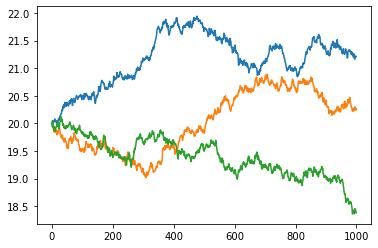

In [22]:
for i in range(3):
    plt.plot(b.normal(1000))
plt.show()

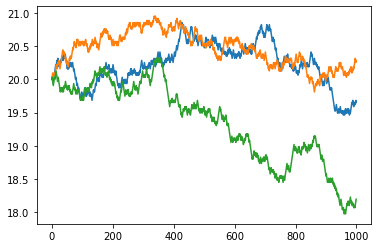

In [23]:
for i in range(3):
    plt.plot(b.random_walk(1000))
plt.show()

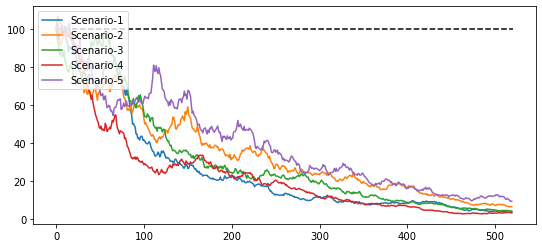

In [24]:
plot_stock_price(mu=0.2,sigma=0.7)


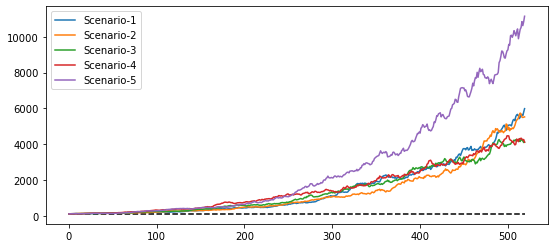

In [25]:
plot_stock_price(mu=0.2,sigma=0.5)


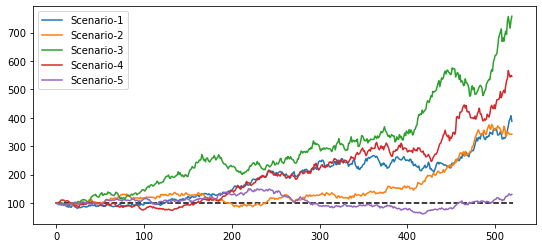

In [26]:
plot_stock_price(mu=0.2,sigma=0.6)


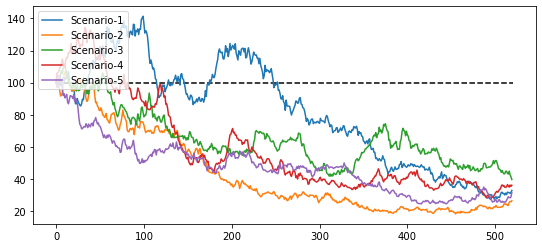

In [27]:
plot_stock_price(mu=0.2,sigma=0.65)
